# Zhenfeng Liang 

# MTH9875 Homework 5

Assigned: October 1, 2015.
Due: October 15, 2015 by 6pm.

Late homework **will not be accepted**.

<font color = "red">Homework is to be done by each student individually.  To receive full credit, you must email a completed copy of this iPython notebook to Tai-Ho Wang and Jim Gatheral by the due date and time.  All R-code must run correctly and solutions must be written up neatly in Markdown/LaTeX format.

## An empirical SPX volatility surface

Friday, September 16, 2011 was triple witching day for SPX options and futures.  Thus, the volatility surface as of the close on the 15th, that includes September options expiring the following morning, should have a shape just as interesting as the one shown in Figure 3.2 of The Volatility Surface.  Indeed more interesting, because the term structure of volatility was downwards sloping.

### 1. (3 points)
$$
\newcommand{\supp}{\mathrm{supp}}
\newcommand{\E}{\mathbb{E} }
\def\Cov{{ \mbox{Cov} }}
\def\Var{{ \mbox{Var} }}
\newcommand{\1}{\mathbf{1} }
\newcommand{\PP}{\mathbb{P} }
%\newcommand{\Pr}{\mathrm{Pr} }
\newcommand{\QQ}{\mathbb{Q} }
\newcommand{\RR}{\mathbb{R} }
\newcommand{\DD}{\mathbb{D} }
\newcommand{\HH}{\mathbb{H} }
\newcommand{\spn}{\mathrm{span} }
\newcommand{\cov}{\mathrm{cov} }
\newcommand{\sgn}{\mathrm{sgn} }
\newcommand{\HS}{\mathcal{L}_{\mathrm{HS}} }
%\newcommand{\HS}{\mathrm{HS} }
\newcommand{\trace}{\mathrm{trace} }
\newcommand{\LL}{\mathcal{L} }
%\newcommand{\LL}{\mathrm{L} }
\newcommand{\s}{\mathcal{S} }
\newcommand{\ee}{\mathcal{E} }
\newcommand{\ff}{\mathcal{F} }
\newcommand{\hh}{\mathcal{H} }
\newcommand{\bb}{\mathcal{B} }
\newcommand{\dd}{\mathcal{D} }
\newcommand{\g}{\mathcal{G} }
\newcommand{\half}{\frac{1}{2} }
\newcommand{\T}{\mathcal{T} }
\newcommand{\bi}{\begin{itemize}}
\newcommand{\ei}{\end{itemize}}
\newcommand{\beq}{\begin{equation}}
\newcommand{\eeq}{\end{equation}}
\newcommand{\beas}{\begin{eqnarray*}}
\newcommand{\eeas}{\end{eqnarray*}}
$$
Derive the put-call parity formula for European options in the form

$$
C-P=PV\,(F-K)
$$ 

where $C$ is the call price, $P$ is the put price, $F$ is the forward price, $K$ is the strike and $PV$ is the discount factor.

### Solution 1

By constructing a portfolio, long a call and short a put with the same $T$ and $K$, then the payoff of the portfolio is,

$$
payoff = max(S_T - K, 0) - max(K - S_T, 0) = S_T - K
$$

which equals to the payoff of a Forward contract with expiration $T$ and strike $K$.

Under no arbitrage condition, the cost of the portfolio must be the same as the cost of the Forward contract.

The payoff of the forward contract is $F_T - K$. The cost equals to the payoff times a discount factor. 

Therefore, we have:
$$
C - P = PV(F - K)
$$


### Download some code

The following code sources *BlackScholes.R* which has the Black-Scholes formula and implied volatility computation and *Heston2.R* which has in particular the *impvolHeston* function.

In [415]:
download.file(url="http://mfe.baruch.cuny.edu/wp-content/uploads/2014/09/MTH9875_4_rFiles.zip", destfile="rFiles4.zip")
unzip(zipfile="rFiles4.zip")

source("BlackScholes.R")
source("Heston2.R")
source("plotIvols.R")
source("svi.R")
source("sviVolSurface.R")

### 2.  (8 points) 

Given $n$ option strikes from a given expiration $T$, write R-code to take the $2\,n$ option prices and return $F$ and $PV$ for that expiration (obviously you need at least two strikes).  Test your code on the following prices for European options expiring in 36 days:

| Strike | Call price | Put price |
|--------|---------:|----------:|
| 1190 | 52.23 | 37.51 | 
| 1195 | 49.11 | 39.34 | 
| 1200 | 46.59 | 41.52 | 
| 1205 | 43.13 | 42.55 | 
| 1210 | 40.21 | 45.40 | 
| 1215 | 37.45 | 47.57 | 
  



With the resulting values of $F$ and $PV$, and using the implied volatility calculator in *BlackScholes.R*, compute implied volatilities for the above options.  Display these by adding a column to the above table.

### Solution 2

In [416]:
# Store the original data
K <- c(1190, 1195, 1200, 1205, 1210, 1215)
C <- c(52.33, 49.11, 46.59, 43.13, 40.21, 37.45)
P <- c(37.51, 39.34, 41.52, 42.55, 45.40, 47.57)

In [417]:
regCPParity <- function(C, P, K)
{   # Linear regression to get F and PV
    
    y <- C - P
    res <- lm(y ~ K)
    PV <- -res$coeff[2]
    F <- res$coeff[1] / PV
    return (c(PV, F))
}

In [418]:
res <- regCPParity(C, P, K)
PV <- res[1]
F <- res[2]
cat("PV =", PV, "F=", F)

PV = 0.9946857 F= 1205.002

In [419]:
backoutBSArgs <- function(PV, F, T)
{    
    S0 <- PV * F
    #T <- 36 / 365.25
    r <- log(PV) / (-T)
    
    return (c(S0, T, r))
}

In [420]:
res <- backoutBSArgs(PV, F, 36 / 365.25)
S0 <- res[1]
T <- res[2]
r <- res[3]
vols <- BSImpliedVolCall(S0, K, T, r, C)
data.frame(cbind(K, C, P, vols))

,K,C,P,vols
1,1190,52.33,37.51,0.2982052
2,1195,49.11,39.34,0.2941361
3,1200,46.59,41.52,0.2941983
4,1205,43.13,42.55,0.287395
5,1210,40.21,45.4,0.2836099
6,1215,37.45,47.57,0.2802798


### Download code for problem 3.

The following code loads the file *spxData110915.rData* into your working directory and sources *plotIvols.R* which has implied volatility smile plotting functionality.

In [421]:
download.file(url="http://mfe.baruch.cuny.edu/wp-content/uploads/2014/09/MTH9875_4_rFiles.zip", destfile="rFiles4.zip")
unzip(zipfile="rFiles4.zip")

download.file(url="http://mfe.baruch.cuny.edu/wp-content/uploads/2014/09/spxOptionMetrics.rData_.zip", destfile="spxOptionMetrics.rData.zip")
unzip(zipfile="spxOptionMetrics.rData.zip")

source("plotIvols.R")

*spxOptionMetrics.rData* contains in particular the data frame `spxData110915` which has all SPX options closing prices as of September 15, 2011.  Data is from OptionMetrics (http://www.optionmetrics.com/index.html) via WRDS (http://wrds-web.wharton.upenn.edu/wrds/).

Note that SPX strike prices are out by a factor of 1000.

In [422]:
load("spxOptionMetrics.rData")

# Inspect the raw data
head(spxData110915[,1:10])


# Constant initialization

daysInYear = 365.25

# SPX strike prices are out by a factor of 1000
spxData110915[,'strike_price'] <- spxData110915[,'strike_price'] / 1000.

,secid,date,symbol,symbol_flag,exdate,last_date,cp_flag,strike_price,best_bid,best_offer
2559920,108105,20110915,SPX 110917C100000,1,20110917,20110815,C,100000,1106.4,1110
2559921,108105,20110915,SPX 110917C1000000,1,20110917,20110915,C,1000000,206.4,210
2559922,108105,20110915,SPX 110917C1005000,1,20110917,20110829,C,1005000,200.2,204.1
2559923,108105,20110915,SPX 110917C1010000,1,20110917,20110829,C,1010000,195.2,199.1
2559924,108105,20110915,SPX 110917C1015000,1,20110917,20110912,C,1015000,190.2,194.1
2559925,108105,20110915,SPX 110917C1020000,1,20110917,20110909,C,1020000,186.5,190.1


In [423]:
dataProcess <- function(spxData)
{
    
    # Store all call options
    spxData_Call <- subset(spxData[,c("exdate", "strike_price", "cp_flag", "best_bid", "best_offer", "open_interest")], 
                           cp_flag == "C")
    
    # Store all put options
    spxData_Put <- subset(spxData[,c("exdate", "strike_price","cp_flag" ,"best_bid", "best_offer", "open_interest")], 
                          cp_flag == "P")
    
    # Merge the two option data frame
    spxData_combined <- merge(spxData_Call, spxData_Put, by=c("exdate","strike_price"))
    
    # Split the data frame based on expiry
    optionByExDates <- split( spxData_combined , f = spxData_combined$exdate ) 
    
    return (optionByExDates)
}

backOutBSArgsForExp <- function(data, T)
{
    
    
    # 1. First we compute the forward price and PV
    # Filter any zero prices
    filter_data <- subset(data, best_bid.x > 0 &  best_bid.y > 0)
        
    # Compute the call mid quote
    call_mid <- (filter_data['best_bid.x'] + filter_data['best_offer.x']) / 2

    # Compute the put mid quote
    put_mid <- (filter_data['best_bid.y'] + filter_data['best_offer.y']) / 2       
        
    regRes <- regCPParity(as.vector(call_mid)[[1]], as.vector(put_mid)[[1]], as.vector(filter_data['strike_price'])[[1]])
    
    argRes <- backoutBSArgs(regRes[1], regRes[2], T)

    return(argRes)
}

In [424]:
tmp <- dataProcess(spxData110915)
head(tmp[[1]])

,exdate,strike_price,cp_flag.x,best_bid.x,best_offer.x,open_interest.x,cp_flag.y,best_bid.y,best_offer.y,open_interest.y
1,20110917,100,C,1106.4,1110,0,P,0,0.05,0
2,20110917,1000,C,206.4,210,4213,P,0,0.05,121754
3,20110917,1005,C,200.2,204.1,11,P,0,0.05,2298
4,20110917,1010,C,195.2,199.1,5,P,0,0.05,5810
5,20110917,1015,C,190.2,194.1,5,P,0,0.05,4321
6,20110917,1020,C,186.5,190.1,10,P,0,0.05,9221


In [425]:
calImpVol <- function(subdata, S0, r)
{
    
    T <- subdata['Texp'][[1]]
    
    #res['Expiry'] <- subdata[, 'exdate']
    #res['Texp'] <- subdata[, 'Texp']
    #res['Strike'] <- subdata[, 'strike_price']
    res <- subdata[, c('exdate', 'Texp', 'strike_price')]
    
    # We may need to consider open interest effect later, right now, just calculate the call imp vol
    res['Bid'] <- BSImpliedVolCall(S0, as.vector(subdata['strike_price'])[[1]], T, r, as.vector(subdata['best_bid.x'])[[1]])
    res['Ask'] <- BSImpliedVolCall(S0, as.vector(subdata['strike_price'])[[1]], T, r, as.vector(subdata['best_offer.x'])[[1]])
    
    Fwd <- S0 * exp(r * T)
    res['Fwd'] <- Fwd
    
    colnames(res) <- c("Expiry", "Texp", "Strike", "Bid", "Ask", "Fwd")
    
    tol <- 2e-10
    
    minBid <- min(res$Bid) 
    minAsk <- min(res$Ask) 
    res$Bid[res$Bid == minBid] <- NaN
    res$Ask[res$Ask == minAsk] <- NaN
    
    return(res)
}

In [426]:
generateIvols <- function(spxData){
    # function to return implied volatilities for all strikes and expirations in a data frame
    #
    # Args:
    #   optionData: A dataframe, which contains Strike, Call price, and Put Price 
    #
    # return: A vector containing Forward price and zero coupon bond

    
    # The evaluation date
    valDate <- as.Date(toString(unique(spxData110915[,"date"])[1]), '%Y%m%d')

    optionByExDates <- dataProcess(spxData)
    
    
    exDateCnt <- length(optionByExDates)
 
    # Store the final result
    df <- data.frame(Expirys=character(),
                     Texp=double(),
                     Strike=integer(),
                     Bid=double(),
                     Ask=double(),
                     Fwd=double())   
    

    # Loop through each ex dates
    for (i in  1:exDateCnt)
    {
        subdata <- optionByExDates[[i]]

        subdata['Texp'] <- (as.Date(toString(unique(subdata[,'exdate'])[1]), '%Y%m%d') - valDate) / daysInYear
        

        argRes <- backOutBSArgsForExp(subdata, subdata['Texp'][[1]])
        S0 <- argRes[1]
        T <- argRes[2]
        r <- argRes[3]           
        
        res <- calImpVol(subdata, S0, r)
        
        df <- rbind(df, res)
        #print(head(res))
        #cat("\nS0=",S0, "T=",T,"r=",r, "\n")
    }
    
    
    #return(optionByExDates)
    return(df)
}

In [427]:
res <- generateIvols(spxData110915)
head(res)

,Expiry,Texp,Strike,Bid,Ask,Fwd
1,20110917,0.005475702,100,NaN,10,1207.987
2,20110917,0.005475702,1000,NaN,1.473453,1207.987
3,20110917,0.005475702,1005,NaN,1.297178,1207.987
4,20110917,0.005475702,1010,NaN,1.2674,1207.987
5,20110917,0.005475702,1015,NaN,1.23769,1207.987
6,20110917,0.005475702,1020,NaN,1.357487,1207.987


### (b)

Warning message:
In min(k[include]): no non-missing arguments to min; returning InfWarning message:
In max(k[include]): no non-missing arguments to max; returning -InfWarning message:
In min(bidVol[include]): no non-missing arguments to min; returning InfWarning message:
In max(askVol[include], na.rm = T): no non-missing arguments to max; returning -Inf

ERROR: Error in plot.window(...): need finite 'xlim' values


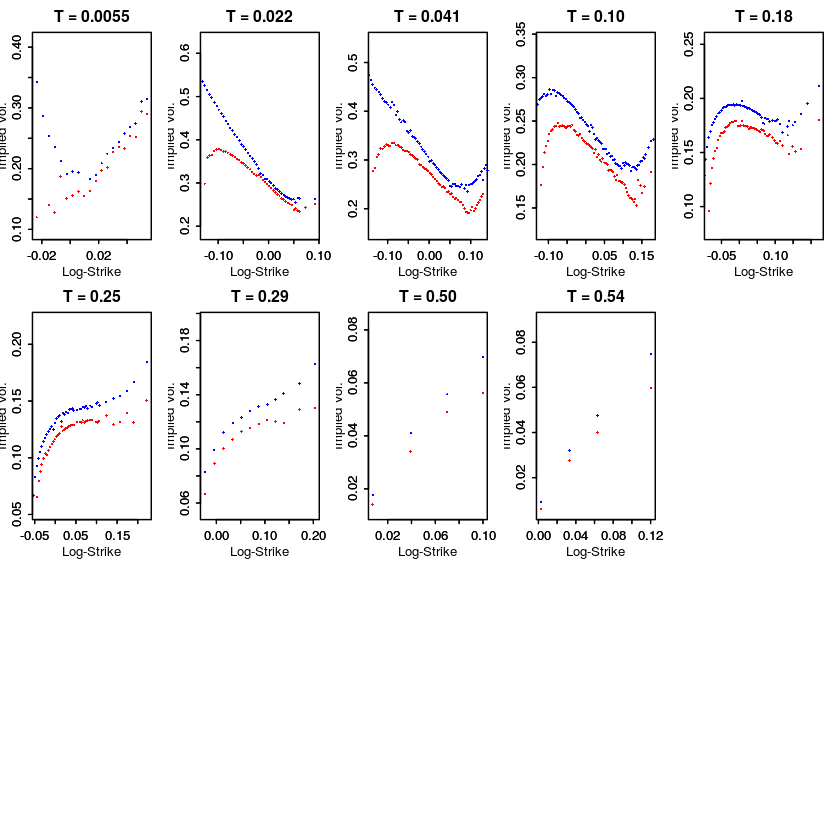

In [428]:
# Sort the data frame
volData <- res[with(res, order(Expiry, Strike)), ]
plotIvols(volData)

### 3.  (20 points) 

(a)
Write a function in R called *generateIvols* that inputs *spxData110915* and outputs bid and offer implied volatilities for all strikes and expirations in a data frame that has the same format as the dataframe `spxOptData` from Lecture 5.


(b)
Plot your results using *plotIvols()*; your picture should look something like Figure 6 in the lecture slides (without the orange SVI fit of course).


## Rough calibration of the Heston parameters

### 4.  (20 points) 

(a)
Using the Lecture 5 R-code as a base, write R-code to fit the approximate formula (23) for ATM variance skew to the empirical ATM skew estimates in Table 2. 


(b)
Using your code from (a) and all the points, assuming $\rho=-0.7$, estimate the Heston parameters $\lambda$ and $\eta$. How similar are your estimates the Heston parameters $\lambda$ and $\eta$ to the estimates from September 2005 listed in Table 3 of Lecture 5?  Are Heston fitted parameters stable over time?


(c)
Repeat (a) and (b) dropping the first three rows of Table 2, as in Lecture 5.


(d) Fit a power law of the form $A/T^\alpha$ to the ATM variance skew data (all points).


(e) 
Superimpose graphs of your resulting ATM skew fits from (b), (c), and (d) to generate a plot like Figure 8 of Lecture 5.


(f)
Amend the plotIvols() code (renaming it plotIvolsHeston(..)) to take data and Heston parameters as input and superimpose Heston smiles on the empirical smiles.  Using your fitted parameters from (f) to get a picture like Figure 6 (except that Heston doesn't fit!). (You may have to vectorize the *impvolHeston* function to get this to work in the iPython notebook.)

(g) 
Note that the Heston smiles are consistently below the empirical smiles.  Why is that? How do Heston skews compare with empirical skews?

### Solution 4

### (a)

### Empirical ATM levels and skews

| Expiration | Time to expiry | ATM Variance | ATM Skew |
|------------|----------------|-------------:|---------:|
| Sep-11     | 1 day          | 0.0494       | -0.7343  |
| Oct-11     | 1 month        | 0.0831       | -0.5164  |
| Nov-11     | 2 months       | 0.0841       | -0.4439  |
| Dec-11     | 3 months       | 0.0825       | -0.3741  |
| Mar-12     | 6 months       | 0.0786       | -0.2525  |
| Jun-12     | 9 months       | 0.0761       | -0.2122  |
| Dec-12     | 15 months      | 0.0728       | -0.1658  |
| Jun-13     | 21 months      | 0.0699       | -0.1339  |
| Dec-13     | 27 months      | 0.0692       | -0.1185  |

Table 2: At-the-money SPX variance levels and variance skews as of 3pm on September 15, 2011, the day before expiration.

In [429]:
### data input
atmSkews <- c(-0.7343,-0.5164,-0.4439,-0.3741,-0.2525,-0.2122,-0.1658,-0.1339,-0.1185)
atmVars <- c(0.0494, 0.0831, 0.0841, 0.0825, 0.0786, 0.0761, 0.0728, 0.0699, 0.0692)
texp <- c(1, 30, 60, 90, 180, 270, 450, 630, 810) / 365.25

In [430]:
skewHeston <- function(skewParams,texp)
{
    rhoeta <- skewParams[1]
    lam <- skewParams[2]
    lt <- lam*texp
    skew <- rhoeta/lt*(1-(1-exp(-lt))/lt)	
    
    return(skew)   
}

skewObjective1 <- function(skewParams)
{
    
    skewModel <- skewHeston(skewParams,texp)
    skewEmpirical <- atmSkews
    obj <-sum((skewModel-skewEmpirical)^2)
    
    return(obj*1000000)    
}

In [431]:
res1 <- optim(c(-.7*.39,1.15),skewObjective1)
fit1 <- res1$par 
rhoeta <- fit1[1]
lam <- fit1[2]

### (b)

### Heston fit to the SPX implied volatility surface

<table>
<tr>
    <td>$v$</td>
    <td><font color="white">-<font color="black">0.0174</td>
</tr>
<tr>
    <td>$\bar{v}$</td>
    <td><font color="white">-<font color="black">0.0354</td>
</tr>
<tr>
    <td>$\eta$</td>
    <td><font color="white">-<font color="black">0.3877</td>
</tr>
<tr>
    <td>$\rho$</td>
    <td>-0.7165</td>
</tr>
<tr>
    <td>$\lambda$</td>
    <td><font color="white">-<font color="black">1.3253</td>
</tr>
</table>

Table 3: Heston fit to the SPX surface as of the close on September 15, 2005.

In [432]:
rho <- -.7
eta <- rhoeta / rho
cat("Heston parameters estimated using Sep, 2005 data. eta is:", 0.3877, "lambda is", 1.3253)
cat("\neta estimated is:", eta, "lambda estimated is:", lam)

Heston parameters estimated using Sep, 2005 data. eta is: 0.3877 lambda is 1.3253
eta estimated is: 1.984315 lambda estimated is: 8.118106

### Comments

It is not similar at all. The Heston fitted parameters will change over time.

### (c)

In [433]:
### Drop out first three terms

skewObjective2 <- function(skewParams)
{    
    skewModel <- skewHeston(skewParams,texp[-(1:3)])
    skewEmpirical <- atmSkews[-(1:3)]
    obj <-sum((skewModel-skewEmpirical)^2)

    return(obj*1000000)
    
}


In [434]:
res2 <- optim(c(-.7*.39,1.15),skewObjective2)
fit2 <- res2$par
rhoeta2 <- fit2[1]
lam2 <- fit2[2]

In [435]:
rho <- -.7
eta2 <- rhoeta2 / rho
cat("Heston parameters estimated using Sep, 2005 data. eta is:", 0.3877, "lambda is", 1.3253)
cat("\neta estimated is:", eta2, "lambda estimated is:", lam2)

Heston parameters estimated using Sep, 2005 data. eta is: 0.3877 lambda is 1.3253
eta estimated is: 1.364782 lambda estimated is: 3.827859

### Comments

It is still not similar at all. The Heston fitted parameters will change over time.

### (d)

In [436]:
# power law objective function
skewObjectivePL <- function(alpha)
{    
    skewModel <- atmSkews[5]*(texp[5]/texp)^alpha
    skewEmpirical <- atmSkews
    obj <-sum((skewModel-skewEmpirical)^2)
    return(obj*1000000)   
}

In [437]:
resPL <- optim(.4,skewObjectivePL)
fitPL <- resPL$par
alpha <- fitPL[1]

Warning message:
In optim(0.4, skewObjectivePL): one-dimensional optimization by Nelder-Mead is unreliable:
use "Brent" or optimize() directly

### (e)

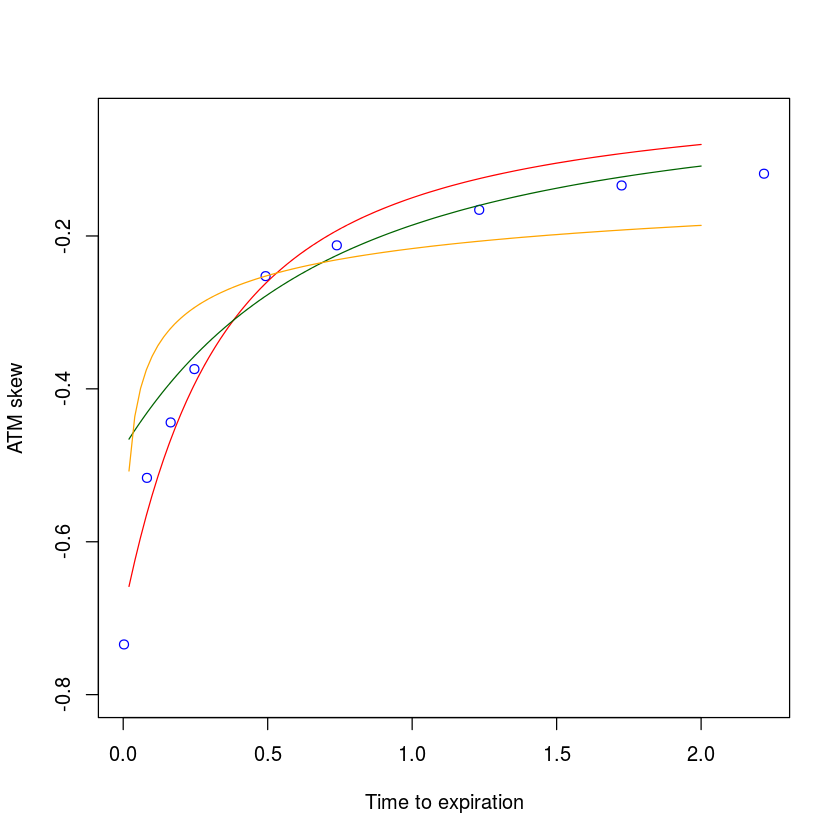

In [438]:
plot(texp,atmSkews,col="blue",ylim=c(-.80,-.05),xlab="Time to expiration",ylab="ATM skew")
curve(skewHeston(fit1,x),from=0,to=2,col="red",add=TRUE)
curve(skewHeston(fit2,x),from=0,to=2,col="dark green",add=TRUE)
curve(atmSkews[5]*(texp[5]/x)^alpha,from=0,to=2,col="orange",add=TRUE)

### Comments

Since we are using all the points to fit the curve, including the short expiration points, which will give some strange value, the graph does not fit very well.

### (f)

In [439]:
varHeston <- function(varParams,texp)
{
    
    v <- varParams[1]
    vbar <- varParams[2]
    
    lam <- fit1[2]
    
    lt <- lam*texp
    var <- vbar + (v-vbar)*(1-exp(-lt))/lt
    return(var)
    
}

varObjective <- function(varParams)
{
    
    #varModel <- varHeston(varParams,texp[-1])
    #varEmpirical <- atmVars[-1]
    
    varModel <- varHeston(varParams,texp)
    varEmpirical <- atmVars
    
    obj <-sum((varModel-varEmpirical)^2)
    return(obj*1000000)
    
}

plotIvolsHeston <- function(ivolData,paramsHeston,slices=NULL){

    bidVols <- as.numeric(ivolData$Bid);
    askVols <- as.numeric(ivolData$Ask);
    expDates <- unique(ivolData$Texp);
    nSlices <- length(expDates);
    if(!is.null(slices)) {nSlices <- length(slices)} else {slices <- 1:nSlices};
    colnum <- sqrt(nSlices*2);
    rows <- round(colnum/2,0);
    columns <- round(colnum,0);
    while(rows*columns < nSlices) {rows <- rows+1;}

    atmVol <- numeric(nSlices);
    atmSkew <-numeric(nSlices);

    # vectorize the impvolHeston function 
    volHeston <- function(k,t){impvolHeston(paramsHeston)(k,t)}
    
    ###############################################################################################################
    #Plot all the slices
    par(mfrow=c(rows,columns),mex=0.5)
    for (slice in slices){
            t <- expDates[slice];
            texp <- ivolData$Texp;
            bidVol <- bidVols[texp==t];
            askVol <- askVols[texp==t];
            midVol <- (bidVol+askVol)/2;
            f <- (ivolData$Fwd[texp==t])[1];
            k <- log(ivolData$Strike[texp==t]/f); # Plot vs log-strike
            include <- !is.na(bidVol);
            kmin <- min(k[include]);
            kmax <- max(k[include]);
            ybottom <- 0.8*min(bidVol[include]);
            ytop <- 1.2*max(askVol[include],na.rm=T);
            xrange <- c(kmin,kmax);
            yrange <- c(ybottom,ytop);

            plot(k,bidVol,col="red",pch=18,cex=.5, xlim=xrange,ylim=yrange,main=paste("T =",format(t,digits=2,nsmall=2)),xlab="Log-Strike",ylab="Implied Vol.");
par(new=T);
plot(k,askVol,col="blue",pch=18,cex=.5,xlim=xrange,ylim=yrange,main=NA,xlab=NA,ylab=NA);

            vol <- function(logStrikes){sapply(logStrikes,function(log_k){volHeston(log_k,t)})}
    
            curve(vol(x),from=kmin,to=kmax,col="orange",lwd=2,add=TRUE);
                   
            # Compute and store empirical levels and skews
            kIn <- k[!is.na(midVol)];
            volIn <- midVol[!is.na(midVol)];
            volInterp <- function(xout){stinterp(x=kIn,y=volIn, xout)$y};
            atmVol[slice] <- volInterp(0);
            atmSkew[slice] <- (volInterp(0.01)-volInterp(-0.01))/0.02;
        }
    par(mfrow=c(1,1),mex=1)
    par(new=F)
    return(list(expiries=expDates,atmVol=atmVol,atmSkew=atmSkew));
}

Warning message:
In min(k[include]): no non-missing arguments to min; returning InfWarning message:
In max(k[include]): no non-missing arguments to max; returning -InfWarning message:
In min(bidVol[include]): no non-missing arguments to min; returning InfWarning message:
In max(askVol[include], na.rm = T): no non-missing arguments to max; returning -Inf

ERROR: Error in plot.window(...): need finite 'xlim' values


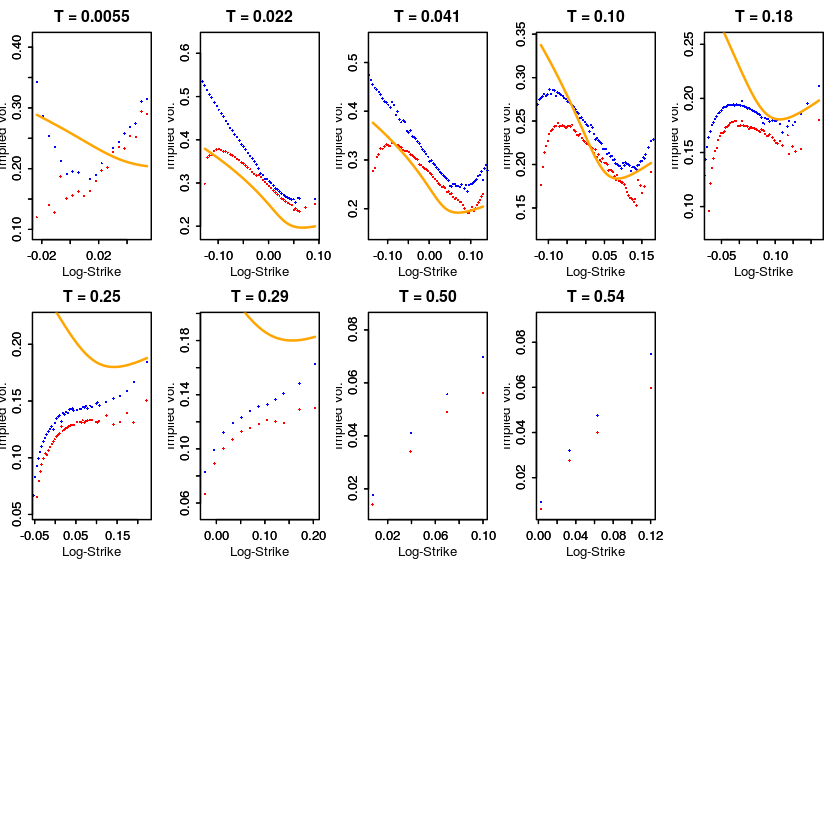

In [440]:
res <- optim(c(0.04,0.04),varObjective)
fit <- res$par

paramsHeston <- list(lambda = fit1[2],rho = rho,eta = fit1[1] / rho,vbar = fit[2],v = fit[1]) 

plotIvolsHeston(volData, paramsHeston)

### (g)

It seems the code only match for some maturities. We may need to further consider about how to choose the right parameters to cal vols